# XJTLU INT104 - Feature Selection

## Environment Configuration

In this experiment, a Python package named "openpyxl" will be used. In this Python script, a separate block will run to ensure that the package is properly installed. On your own machine, once the package is installed, this particular code block should be void.

In [2]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('openpyxl')

## Data Loading

We now load the data file into Python environment. A class named "Data Frame" in "Pandas" is set up. The first column is the index of student hence is removed once data loaded. A box plot is drawn to show the distribution of variables.

     Programme  Gender  Grade  Q1  Q2  Q3    Q4  Q5
4            1       2      2   8   8   6   8.0   3
6            3       1      3   8   4  14  10.0   2
7            1       2      2   6   2   4   8.0   1
9            4       2      2   8   2  14   8.0   2
10           3       2      3   8   6  12   5.0   2
..         ...     ...    ...  ..  ..  ..   ...  ..
441          4       2      2   2   8  14   2.0   2
444          2       2      2   8   8  12  10.0   6
455          4       1      2   6   4  14   8.0   1
459          4       2      2   8   8  14  10.0   2
464          1       2      2   8   8   6  10.0   3

[209 rows x 8 columns]


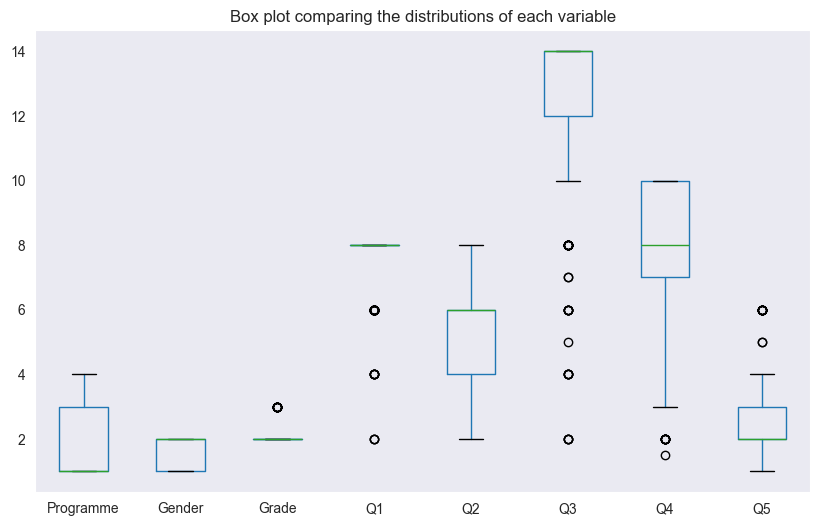

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('training_set.xlsx')

dataframe = dataframe[(dataframe != 0).all(axis=1)]

print(dataframe)

# Obtain the variable name of variables and labels
column_names = dataframe.columns.tolist()
class_names = column_names[0]
variable_names = column_names[1:5]

# Draw a diagram of data distribution
plt.figure(figsize=(10, 6))
dataframe.boxplot(grid=False)
plt.title('Box plot comparing the distributions of each variable')
plt.show()

发现programme3的人都是grade3，根据grade直接分出programme3。

[Validation] Programme3 Grades: [3]


C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3896611929.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


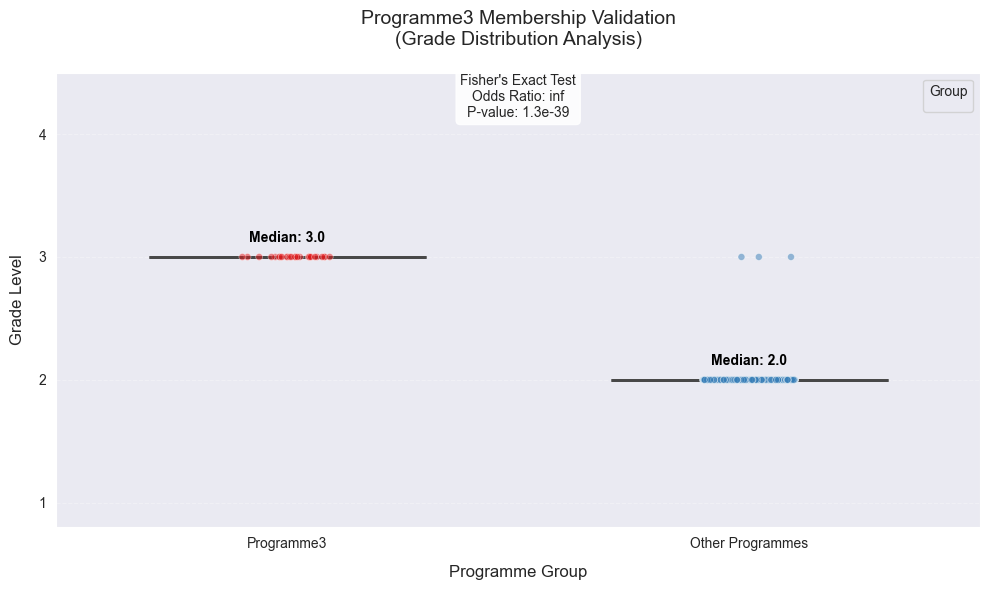

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact

# Load data
df = pd.read_excel("training_set.xlsx", sheet_name="Sheet1")

# Data validation
programme3_grade = df[df["Programme"] == 3]["Grade"].unique()
print(f"[Validation] Programme3 Grades: {programme3_grade}")

# Prepare data
df["Group"] = df["Programme"].apply(lambda x: "Programme3" if x == 3 else "Other Programmes")

# Create figure
plt.figure(figsize=(10, 6))

# Enhanced boxplot with distribution visualization
ax = sns.boxplot(
    x="Group",
    y="Grade",
    data=df,
    width=0.6,
    palette={"Programme3": "#e41a1c", "Other Programmes": "#377eb8"},
    linewidth=2,
    fliersize=0  # Hide outliers
)

# Add stripplot for actual data points
sns.stripplot(
    x="Group",
    y="Grade",
    data=df,
    hue="Group",
    palette={"Programme3": "#e41a1c", "Other Programmes": "#377eb8"},
    dodge=False,
    size=5,
    alpha=0.5,
    edgecolor="w",
    linewidth=0.5,
    jitter=0.1
)

# Statistical annotation
contingency_table = pd.crosstab(df["Group"], df["Grade"] == 3)
odds_ratio, p_value = fisher_exact(contingency_table)

annotation_text = (f"Fisher's Exact Test\n"
                   f"Odds Ratio: {odds_ratio:.1e}\n"
                   f"P-value: {p_value:.1e}")

plt.text(
    0.5, 4.3,
    annotation_text,
    ha="center",
    va="center",
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)

# Style adjustments
plt.title("Programme3 Membership Validation\n(Grade Distribution Analysis)", fontsize=14, pad=20)
plt.xlabel("Programme Group", fontsize=12, labelpad=10)
plt.ylabel("Grade Level", fontsize=12, labelpad=10)
plt.ylim(0.8, 4.5)
plt.yticks([1, 2, 3, 4])
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Add median line annotation
for i, group in enumerate(["Programme3", "Other Programmes"]):
    med = df[df["Group"] == group]["Grade"].median()
    ax.text(i, med + 0.1, f"Median: {med}",
            ha="center", va="bottom",
            fontsize=10, color="black", weight="bold")

# Ensure legend shows only group colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", loc="upper right")

plt.tight_layout()
plt.show()

对剩下删除了grade gender以及所有programme3的行进行分析

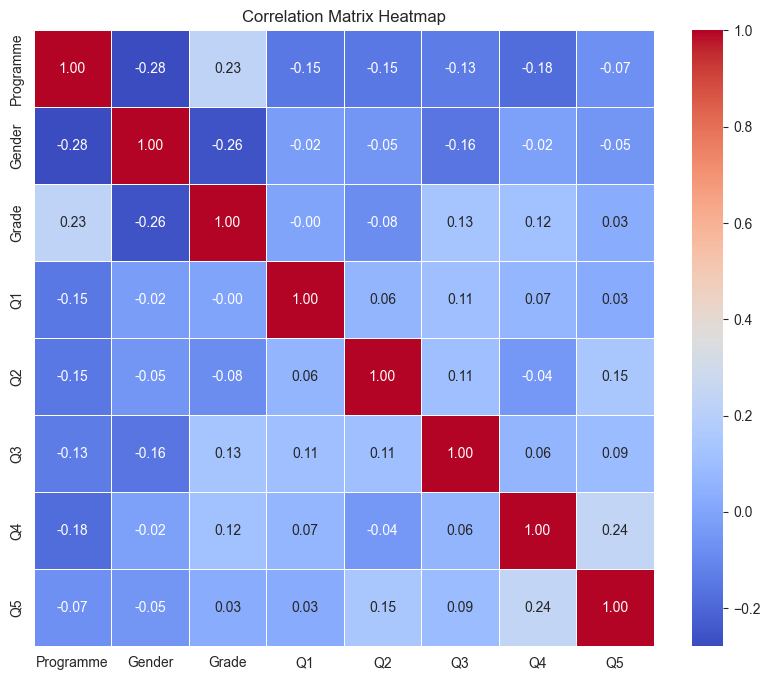

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关系数矩阵
corr_matrix = dataframe.corr()

# 画热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 设置标题
plt.title("Correlation Matrix Heatmap")
plt.show()



In [6]:
# 删除 Programme 列中等于 3 的所有行
dataframe = dataframe[dataframe['Programme'] != 3]

if 'Grade' in dataframe.columns:
    dataframe = dataframe.drop(columns=['Grade'])

if 'Gender' in dataframe.columns:
    dataframe = dataframe.drop(columns=['Gender'])

print(dataframe)

     Programme  Q1  Q2  Q3    Q4  Q5
4            1   8   8   6   8.0   3
7            1   6   2   4   8.0   1
9            4   8   2  14   8.0   2
12           2   8   6   8   7.0   2
17           4   8   6  14   8.0   3
..         ...  ..  ..  ..   ...  ..
441          4   2   8  14   2.0   2
444          2   8   8  12  10.0   6
455          4   6   4  14   8.0   1
459          4   8   8  14  10.0   2
464          1   8   8   6  10.0   3

[195 rows x 6 columns]


In [7]:
# 删除dataframe里有0的行
dataframe = dataframe[(dataframe != 0).all(axis=1)]
print(dataframe)

     Programme  Q1  Q2  Q3    Q4  Q5
4            1   8   8   6   8.0   3
7            1   6   2   4   8.0   1
9            4   8   2  14   8.0   2
12           2   8   6   8   7.0   2
17           4   8   6  14   8.0   3
..         ...  ..  ..  ..   ...  ..
441          4   2   8  14   2.0   2
444          2   8   8  12  10.0   6
455          4   6   4  14   8.0   1
459          4   8   8  14  10.0   2
464          1   8   8   6  10.0   3

[195 rows x 6 columns]


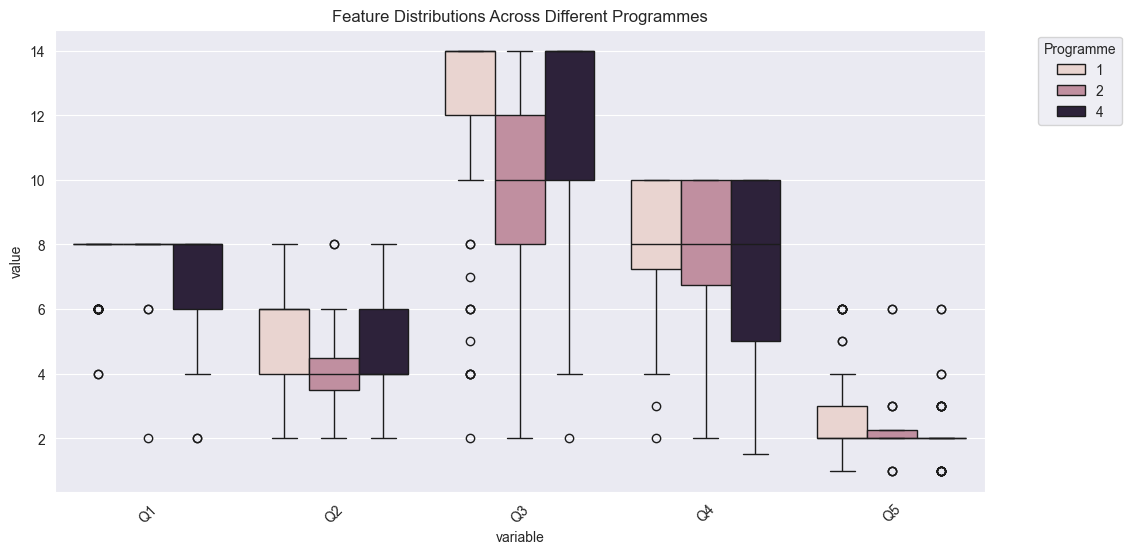

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 将数据转换成长格式 (long format)
melted_df = dataframe.melt(id_vars=['Programme'], var_name='variable', value_name='value')

# 画箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="variable", y="value", hue="Programme", dodge=True)

# 美化
plt.xticks(rotation=45)
plt.title("Feature Distributions Across Different Programmes")
plt.legend(title="Programme", bbox_to_anchor=(1.05, 1), loc='upper left')  # 调整图例位置
plt.show()

Now, you could try to observe the potential correlations between a set of variables and a certain set of classes. 

> What is the aim of the observation?

In [9]:
# x_axis_1 = 'Q1'
# x_axis_1 = 'Q2'
# x_axis_1 = 'Q3'
x_axis_1 = 'Q4'
# x_axis_1 = 'Q5'

In [10]:
# y_axis_1 = 'Q1'
# y_axis_1 = 'Q2'
# y_axis_1 = 'Q3'
# y_axis_1 = 'Q4'
y_axis_1 = 'Q5'

In [11]:
class_1 = 'Programme'

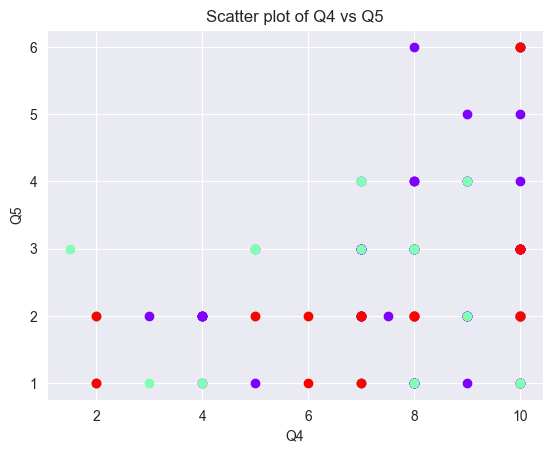

In [12]:
import numpy as np

classes_1 = dataframe[class_1].unique()  # get the unique classes
colors_1 = plt.cm.rainbow(np.linspace(0, 1, len(classes_1)))  # generate a color for each class

for i, class_type in enumerate(classes_1):
    plt.scatter(
        dataframe.loc[dataframe[class_1]==class_type, x_axis_1],
        dataframe.loc[dataframe[class_1]==class_type, y_axis_1],
        color=colors_1[i]  # define the color for each class in the scatter plot
    )

plt.xlabel(x_axis_1)
plt.ylabel(y_axis_1)
plt.title('Scatter plot of ' + x_axis_1 + ' vs ' + y_axis_1)
plt.show()

## Data Scaled

The original data distribution is very hard to observe. The data is then scaled for easier observation. A standard way is to remove the differences of mean and standardise the stand deviation to 1. The following diagram has shown the distribution of scaled features.

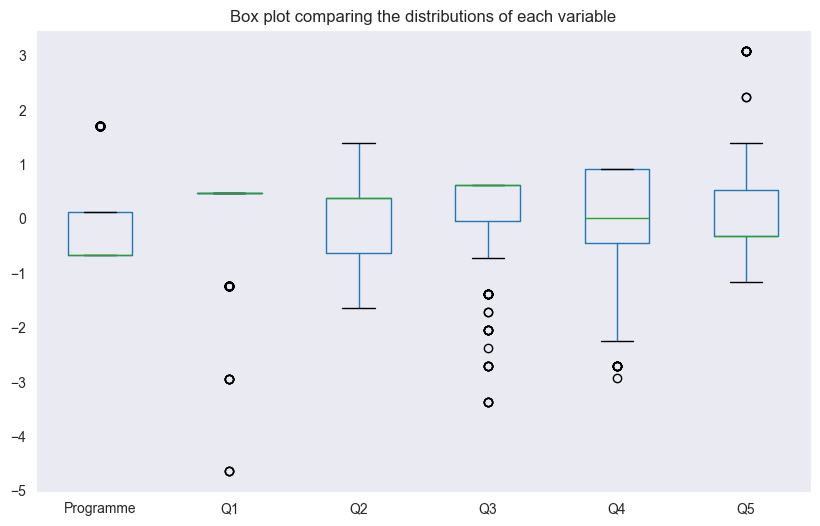

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

plt.figure(figsize=(10, 6))
scaled_df.boxplot(grid=False)
plt.title('Box plot comparing the distributions of each variable')
plt.show()

Now let's observe the data again. 

> Does the scaling process impact observation? If not, think about why scaling matters?

In [14]:
# x_axis_2 = 'Q1'
# x_axis_2 = 'Q2'
# x_axis_2 = 'Q3'
x_axis_2 = 'Q4'
# x_axis_2 = 'Q5'

In [15]:
# y_axis_2 = 'Q1'
# y_axis_2 = 'Q2'
# y_axis_2 = 'Q3'
# y_axis_2 = 'Q4'
y_axis_2 = 'Q5'

In [16]:
class_2 = 'Programme'

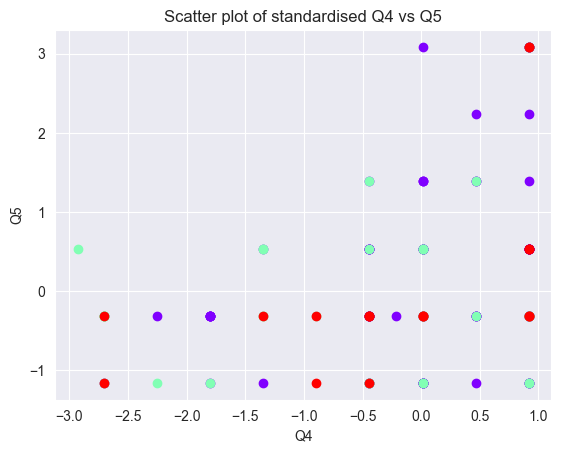

In [17]:
classes_2 = scaled_df[class_2].unique()  # get the unique classes
colors_2 = plt.cm.rainbow(np.linspace(0, 1, len(classes_2)))  # generate a color for each class

for i, class_type in enumerate(classes_2):
    plt.scatter(
        scaled_df.loc[scaled_df[class_2]==class_type, x_axis_2],
        scaled_df.loc[scaled_df[class_2]==class_type, y_axis_2],
        color=colors_2[i]  # define the color for each class in the scatter plot
    )

plt.xlabel(x_axis_2)
plt.ylabel(y_axis_2)
plt.title('Scatter plot of standardised ' + x_axis_2 + ' vs ' + y_axis_2)
plt.show()

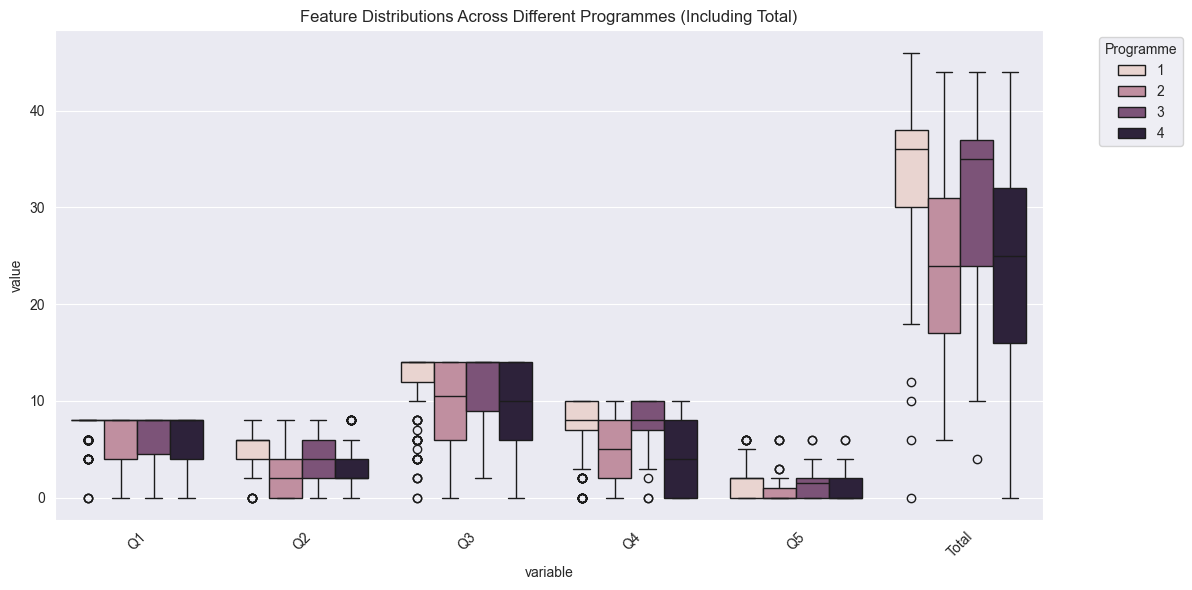

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

dataframe = pd.read_excel('training_set.xlsx')

# 只选择数值型列进行标准化
numeric_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']  # 直接使用给定的列
scaler = StandardScaler()
# scaled_data = scaler.fit_transform(dataframe[numeric_cols])
scaled_df = pd.DataFrame(dataframe[numeric_cols], columns=numeric_cols)
scaled_df['Programme'] = dataframe['Programme']  # 添加 programme 列

# 添加总分列（标准化后的各列相加）
scaled_df['Total'] = scaled_df[numeric_cols].sum(axis=1)

# 将数据转换成长格式 (long format)
melted_df = scaled_df.melt(id_vars=['Programme'],
                          var_name='variable',
                          value_name='value',
                          value_vars=numeric_cols + ['Total'])  # 包含总分列

# 画箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="variable", y="value", hue="Programme", dodge=True)

# 美化
plt.xticks(rotation=45)
plt.title("Feature Distributions Across Different Programmes (Including Total)")
plt.legend(title="Programme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # 自动调整布局
plt.show()


## Principle Component Analysis

Next, we will observe the distribution of PCA coefficients. We firstly do PCA analysis. The following diagram shows the distribution of PCA coefficients, from which you could see the significance of PCA coefficients is dramatically decreased from the most important components to the least important components.

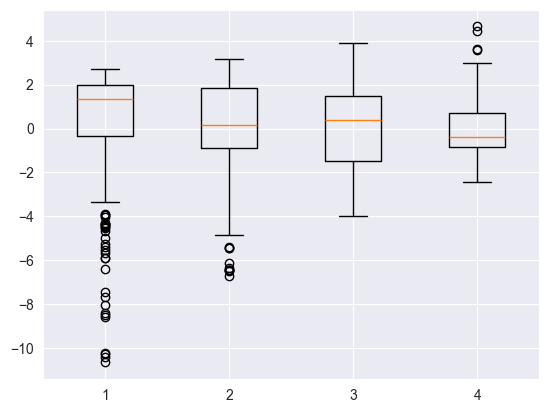

In [19]:
from sklearn.decomposition import PCA

df_numeric = dataframe.select_dtypes(include=[np.number])

pca = PCA(n_components=4, svd_solver='arpack')
df_pca = pca.fit_transform(dataframe)

plt.boxplot(df_pca)
plt.show()

Now please try yourself to find the best way to distinguish students from different programme/gender/grade. 

In [20]:
dim_1 = 1

In [21]:
dim_2 = 2

In [22]:
class_column = 'Programme'

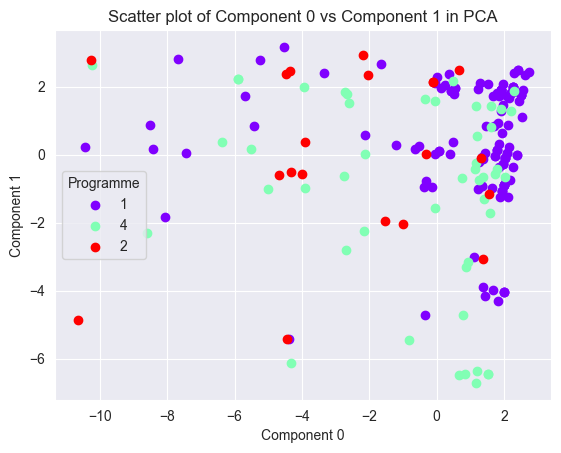

In [23]:
dim_1 = int(dim_1) - 1
dim_2 = int(dim_2) - 1

classes = dataframe[class_column].unique()  # get the unique classes
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))  # generate a color for each class

for i, class_type in enumerate(classes):
    plt.scatter(df_pca[dataframe[class_column]==class_type,dim_1],df_pca[dataframe[class_column]==class_type,dim_2],color=colors[i],label=class_type)

plt.xlabel('Component ' + str(dim_1))
plt.ylabel('Component ' + str(dim_2))
plt.title('Scatter plot of Component ' + str(dim_1) + ' vs Component ' + str(dim_2) + ' in PCA')
plt.legend(title='Programme')
plt.show()

In [24]:
print("PCA Components Shape:", pca.components_.shape)
print("Original DataFrame Columns:", dataframe.columns)

PCA Components Shape: (4, 6)
Original DataFrame Columns: Index(['Programme', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype='object')


You may find some combinations of components are very good at classification.  How can you interpret your findings as a piece of knowledge? We could show the components that we selected for visualisation e.g.,

In [25]:
pca_components = pd.DataFrame([pca.components_[dim_1], pca.components_[dim_2]],columns=dataframe.columns, index=['Component ' + str(dim_1), 'Component ' + str(dim_2)])
print(pca_components)

             Programme        Q1        Q2        Q3        Q4        Q5
Component 0  -0.100113  0.059755  0.151991  0.976094  0.086527  0.055306
Component 1  -0.157681  0.043680 -0.039876 -0.107788  0.965033  0.169504


> This finding basically tells us that we are using existing class information, which assures the classification will be success. In practice, what should we do when a method of feature extraction is proposed?

## t-SNE Observation

A very famous way to observe high-dimensional data is t-SNE, which maps high-dimensional data into low-dimensional ones.  Now let's observe how data is distributed given different sets of features.

> How will evaluate the sets of features that are used as features for classifying the student?

In [26]:
# features = ['Gender','Grade','Q1','Q2','Q3','Q4','Q5']
features = ['Q1','Q2','Q3','Q4','Q5']

In [27]:
class_4 = 'Programme'

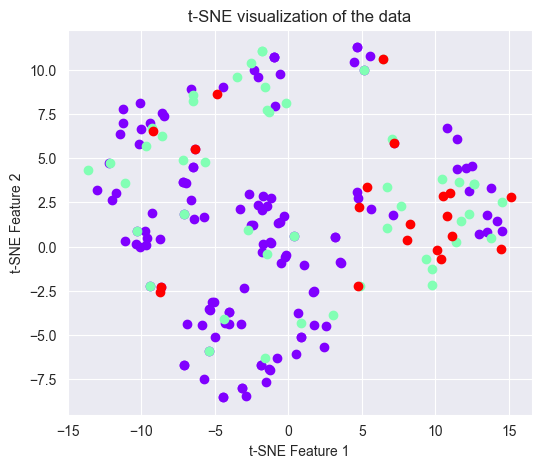

In [28]:
from sklearn.manifold import TSNE

classes_4 = dataframe[class_4].unique()  # get the unique classes
colors_4 = plt.cm.rainbow(np.linspace(0, 1, len(classes_4)))  # generate a color for each class

data_features = dataframe[features[:]]

numerical_df = data_features.select_dtypes(include=[np.number])

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(numerical_df)

plt.figure(figsize=(6, 5))

for i, class_type in enumerate(classes_4):
    plt.scatter(
        tsne_results[dataframe[class_4]==class_type,0],
        tsne_results[dataframe[class_4]==class_type,1],
        color=colors_4[i])

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of the data')
plt.show()

One potential method for evaluating the performance of selected features is to analyze the ratio of the average distance between classes and the average distance within classes. Our goal is to increase the distance between two sample classes while reducing the distance between samples within each class. Consequently, a high ratio value is anticipated.

In [29]:
from scipy.spatial import distance

container = []
dim = len(classes_4)
avg_mat = np.zeros((dim,dim))
ratio = np.ones((dim,dim))

for i, class_type in enumerate(classes_4):
    container.append(tsne_results[dataframe[class_4]==class_type,:])

for i, test1 in enumerate(container):
    for j, test2 in enumerate(container):
        if i == j:
            dm = distance.pdist(test1)
            avg = np.mean(dm)
        else:
            dm = distance.cdist(test1,test2)
            avg = np.mean(dm)
        avg_mat[i,j] = avg

for i in range(len(classes_4)):
    ratio[i,:] = avg_mat[i,:] / avg_mat[i,i]

np.set_printoptions(precision=4)
print('The ratio of inter-class distance over intra-class distance for all classes are shown as: ')
print(ratio)

mask = ratio != 1
average = ratio[mask].mean()
print('The average inter-class distance ratio is ' + str(average) + ' where a larger number indicates a better performance.')

The ratio of inter-class distance over intra-class distance for all classes are shown as: 
[[1.     1.1129 1.199 ]
 [0.9907 1.     0.9844]
 [1.2144 1.1201 1.    ]]
The average inter-class distance ratio is 1.1035786359521018 where a larger number indicates a better performance.


- Now try yourself to select the best feature set.

- You may also want to try other features (e.g. the PCA of marks for each question)

- Find other ways to evaluate the performance of feature set and state the advantages and disadvantages of your method.

与 Programme 最相关的主成分是: PC5, 相关性: -0.1728


C:\Users\18321\AppData\Local\Temp\ipykernel_34016\1006431421.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_programme.index, y=corr_with_programme.values, palette='coolwarm')


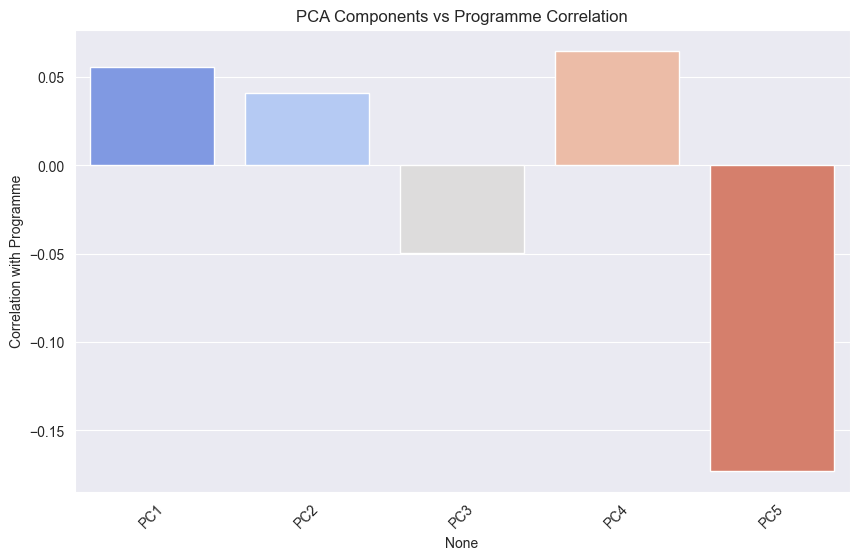

           Q1        Q2        Q3        Q4        Q5
PC1  0.354827  0.396584  0.402847  0.452438  0.591466
PC2 -0.271853 -0.473305 -0.458214  0.628382  0.311856
PC3  0.731719 -0.579807  0.173156  0.144348 -0.278554
PC4 -0.513460 -0.329068  0.771286  0.146304 -0.108563
PC5  0.033770 -0.417423  0.053747 -0.598493  0.680834


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1️⃣ 选择数值变量，并去掉 Programme 列
numeric_features = dataframe.select_dtypes(include=[np.number]).drop(columns=['Programme'], errors='ignore')

# 2️⃣ 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# 3️⃣ PCA 变换
pca = PCA(n_components=min(scaled_data.shape))  # 选择最大可能的主成分数
pca_features = pca.fit_transform(scaled_data)

# 4️⃣ 转换为 DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

# 5️⃣ 处理 Programme 列（如果是类别变量，则转换为数值）
if dataframe['Programme'].dtype == 'object':
    encoder = LabelEncoder()
    programme_encoded = encoder.fit_transform(dataframe['Programme'])
else:
    programme_encoded = dataframe['Programme']

pca_df['Programme'] = programme_encoded  # 加入 Programme 列

# 6️⃣ 计算 Programme 与主成分的相关性
corr_with_programme = pca_df.corr()['Programme'].drop('Programme')

# 7️⃣ 找出最相关的主成分
top_pca = corr_with_programme.abs().idxmax()
print(f"与 Programme 最相关的主成分是: {top_pca}, 相关性: {corr_with_programme[top_pca]:.4f}")

# 8️⃣ 可视化相关性
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_programme.index, y=corr_with_programme.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("Correlation with Programme")
plt.title("PCA Components vs Programme Correlation")
plt.show()

pca_components = pd.DataFrame(pca.components_, columns=numeric_features.columns,
                              index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_components)

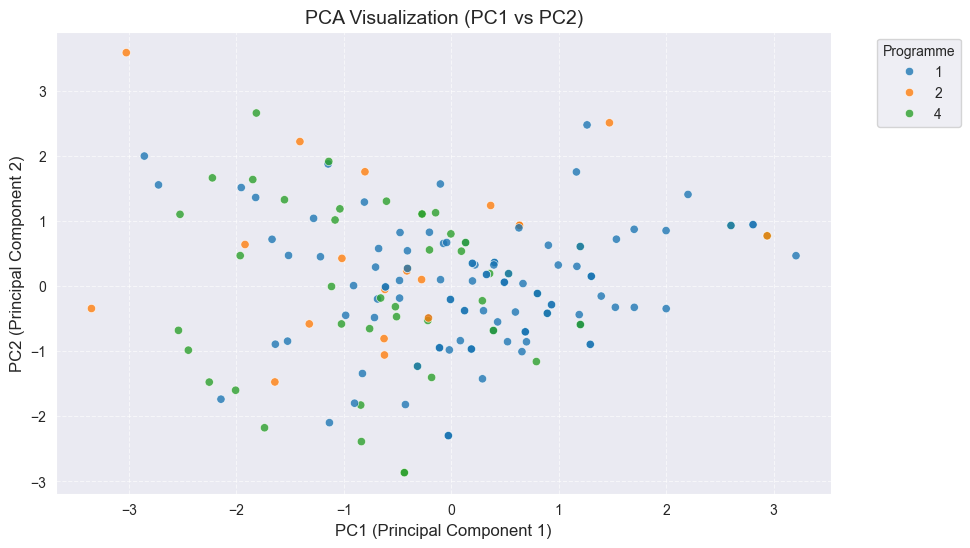

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 复制 DataFrame 并分离特征和类别
df = dataframe.copy()
features = df.drop(columns=["Programme"])  # 除去 Programme 列
labels = df["Programme"]  # 取出 Programme 作为分类标签

# 归一化数据
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 进行 PCA 降维到 2 维
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_features)

# 把 PCA 结果添加回 DataFrame
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

# 画散点图，颜色表示 Programme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Programme", palette="tab10", alpha=0.8)

# 标题 & 轴标签
plt.title("PCA Visualization (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1 (Principal Component 1)", fontsize=12)
plt.ylabel("PC2 (Principal Component 2)", fontsize=12)
plt.legend(title="Programme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)

# 显示图像
plt.show()


调整兰德指数（ARI）: 0.182


C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18321\AppData\Local\Temp\ipykernel_34016\3908705369.py:49: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E})

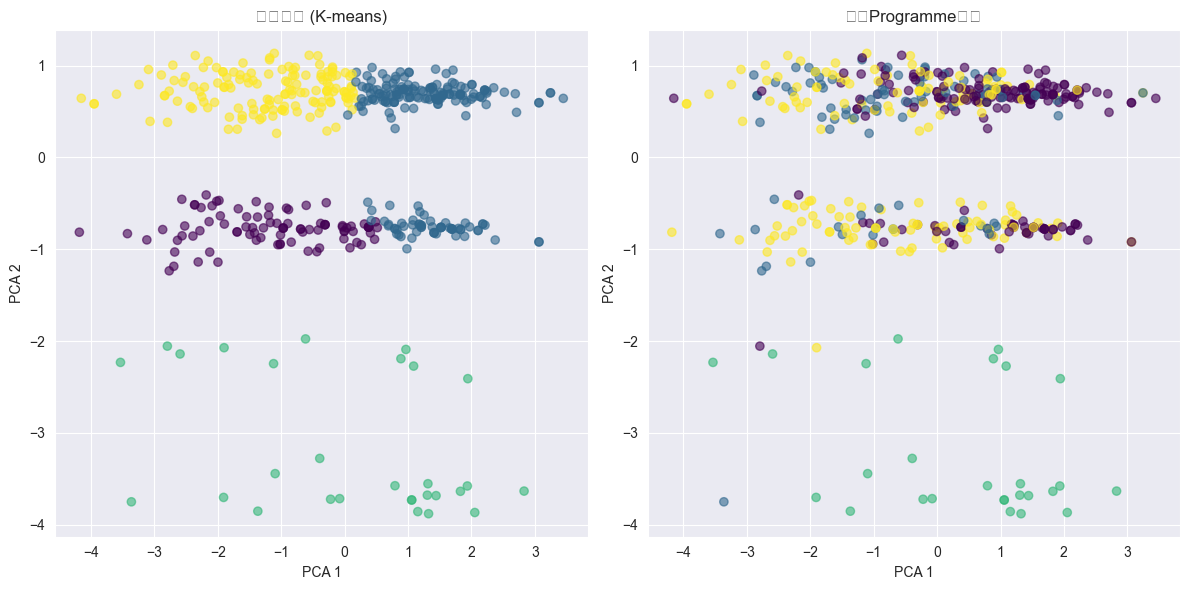

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# 1. 加载数据
df = pd.read_excel("training_set.xlsx", sheet_name="Sheet1")

# 2. 预处理：提取特征并标准化
features = df.drop("Programme", axis=1)
true_labels = df["Programme"]

# 标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. 使用K-means聚类（簇数=4）
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# 4. 评估聚类效果
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"调整兰德指数（ARI）: {ari:.3f}")

# 5. 可视化（PCA降维）
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# 绘制聚类结果
plt.figure(figsize=(12, 6))

# 子图1：聚类结果
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap="viridis", alpha=0.6)
plt.title("聚类结果 (K-means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# 子图2：真实标签
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=true_labels, cmap="viridis", alpha=0.6)
plt.title("真实Programme分布")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 加载数据
df = pd.read_excel("training_set.xlsx", sheet_name="Sheet1")

# 检查数据：处理可能的异常值（例如 Q4=7.5）
# 假设 Q4 应为整数，修正为最接近的整数
df["Q4"] = df["Q4"].round().astype(int)

# 2. 数据预处理
# 定义分类特征和数值特征
numeric_features = ["Q1", "Q2", "Q3", "Q4", "Q5"]

# 划分特征和标签
X = df.drop("Programme", axis=1)
y = df["Programme"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# 3. 构建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)

# 4. 定义贝叶斯分类器
# 使用混合类型的朴素贝叶斯（需安装 scikit-learn >= 0.24）
# 如果版本较低，可仅用 GaussianNB（假设所有特征为数值型）
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GaussianNB())  # 数值特征用高斯分布，分类特征自动忽略
    ]
)

# 5. 训练模型
model.fit(X_train, y_train)

# 6. 预测与评估
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.3f}\n")

# 输出分类报告
print("分类报告:\n", classification_report(y_test, y_pred))

# 混淆矩阵
print("混淆矩阵:\n", confusion_matrix(y_test, y_pred))

模型准确率: 0.583

分类报告:
               precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.33      0.33      0.33         6

    accuracy                           0.58        24
   macro avg       0.26      0.30      0.28        24
weighted avg       0.50      0.58      0.53        24

混淆矩阵:
 [[12  0  0  2]
 [ 1  0  0  1]
 [ 1  0  0  1]
 [ 3  1  0  2]]


C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 加载数据并预处理
df = pd.read_excel("training_set.xlsx", sheet_name="Sheet1")

# 移除 Gender 和 Grade 列
df = df.drop(["Gender", "Grade"], axis=1)

# # 删除 Q1-Q5 中存在 0 的行
q_columns = ["Q1", "Q2", "Q3", "Q4", "Q5"]
# df_clean = df[(df[q_columns] != 0).all(axis=1)]
#
# print(f"原始数据行数: {len(df)}，清理后剩余行数: {len(df_clean)}")

# 2. 划分特征和标签
X = df[q_columns]
y = df["Programme"]

# 3. 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 5. 训练贝叶斯模型
model = GaussianNB()
model.fit(X_train, y_train)

# 6. 预测与评估
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型准确率: {accuracy:.3f}")

# 分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 混淆矩阵
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))


模型准确率: 0.532

分类报告:
              precision    recall  f1-score   support

           1       0.65      0.83      0.73        24
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           4       0.36      0.38      0.37        13

    accuracy                           0.53        47
   macro avg       0.25      0.30      0.27        47
weighted avg       0.43      0.53      0.47        47

混淆矩阵:
[[20  0  0  4]
 [ 4  0  0  4]
 [ 1  0  0  1]
 [ 6  2  0  5]]


C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Grade=2 的数据行数: 437
需分箱的非高斯特征: ['Q1', 'Q3', 'Q4', 'Q5']

模型准确率: 0.568

分类报告:
              precision    recall  f1-score   support

           1       0.61      0.75      0.68        36
           2       0.50      0.06      0.11        16
           4       0.52      0.61      0.56        36

    accuracy                           0.57        88
   macro avg       0.55      0.47      0.45        88
weighted avg       0.56      0.57      0.53        88

混淆矩阵:
[[27  0  9]
 [ 4  1 11]
 [13  1 22]]


C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\PY\Anaconda\envs\INT104\Lib\site-packages\IPython\core\pylabt

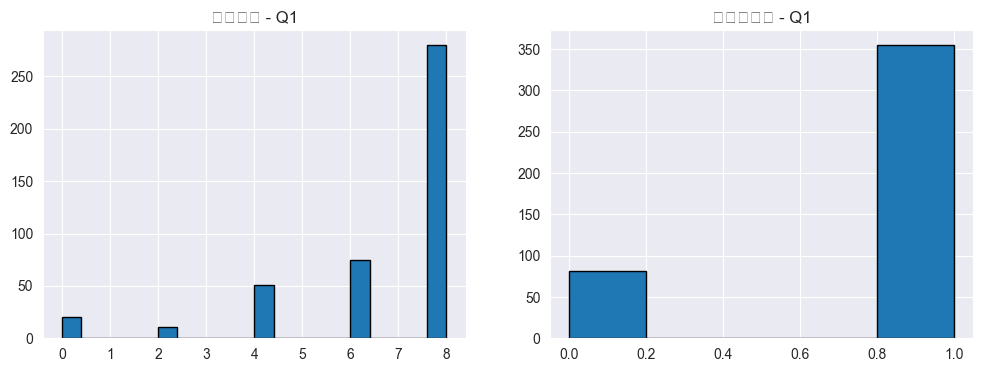

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 加载数据并预处理
df = pd.read_excel("training_set.xlsx", sheet_name="Sheet1")

# 仅保留 Grade=2 的数据，移除 Gender 列
df_grade2 = df[df["Grade"] == 2].drop("Gender", axis=1)
q_columns = ["Q1", "Q2", "Q3", "Q4", "Q5"]
print(f"Grade=2 的数据行数: {len(df_grade2)}")

# 2. 检查 Q1-Q5 的分布是否符合高斯分布
def is_gaussian(feature, skew_threshold=1.0, kurtosis_threshold=1.0):
    skew = feature.skew()
    kurtosis = feature.kurtosis()
    return (abs(skew) < skew_threshold) & (abs(kurtosis) < kurtosis_threshold)

# 判断需要分箱的特征
non_gaussian_features = []
for col in q_columns:
    if not is_gaussian(df_grade2[col]):
        non_gaussian_features.append(col)
print("需分箱的非高斯特征:", non_gaussian_features)

# 3. 对非高斯特征进行等频分箱
if len(non_gaussian_features) > 0:
    # 使用等频分箱（5 箱）
    binner = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")
    df_binned = df_grade2.copy()
    df_binned[non_gaussian_features] = binner.fit_transform(df_grade2[non_gaussian_features])
    # 转换为整数类型
    df_binned[non_gaussian_features] = df_binned[non_gaussian_features].astype(int)
else:
    df_binned = df_grade2.copy()

# 4. 编码分类特征（分箱后的 Q1-Q5）
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(df_binned[q_columns])
y = df_binned["Programme"]

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 6. 训练 CategoricalNB 模型
model = CategoricalNB()
model.fit(X_train, y_train)

# 7. 预测与评估
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型准确率: {accuracy:.3f}")

# 分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 混淆矩阵
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

# 可视化分箱效果（以第一个非高斯特征为例）
if len(non_gaussian_features) > 0:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_grade2[non_gaussian_features[0]], bins=20, edgecolor="k")
    plt.title(f"原始分布 - {non_gaussian_features[0]}")

    plt.subplot(1, 2, 2)
    plt.hist(df_binned[non_gaussian_features[0]], bins=5, edgecolor="k")
    plt.title(f"分箱后分布 - {non_gaussian_features[0]}")
    plt.show()